# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame(columns={"City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"}, index=np.arange(0, len(cities)))

cities = np.array(cities)
print("Beginning Data Retrieval\n")
set_iter = 1
for index, city in np.ndenumerate(cities):
    internal_city = city
    if len(city.split()) > 1:
        internal_city = "%20".join(city.split())
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={internal_city}&units=Imperial"
    response = requests.get(url).json()
    time.sleep(1)
    try:
        cities_df.loc[index, "City"] = response['name']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        print(f"Processing Record {index[0]%50 + 1} of Set {set_iter} | {city}")
    except:
        print("City not found. Skipping...")
    
    if (index[0] + 1)%50 == 0:
        set_iter += 1
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval

Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | pangai
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
City not found. Skipping...
Processing Record 6 of Set 1 | tanabe
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kirillov
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | namibe
City not found. Skipping...
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | bharatpur
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | umm lajj
Processing Record 23 of Set 1 | pangnirtung
City not found. Skipping...
Processing Record 25 of Set 1 | qaanaaq
Processing Recor

Processing Record 6 of Set 5 | pacific grove
Processing Record 7 of Set 5 | inuvik
Processing Record 8 of Set 5 | hualmay
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | carnarvon
Processing Record 12 of Set 5 | anadyr
Processing Record 13 of Set 5 | krasnoselkup
Processing Record 14 of Set 5 | labuhan
Processing Record 15 of Set 5 | les cayes
Processing Record 16 of Set 5 | vila velha
Processing Record 17 of Set 5 | xiaolingwei
Processing Record 18 of Set 5 | alice springs
Processing Record 19 of Set 5 | alexandria
Processing Record 20 of Set 5 | koumac
Processing Record 21 of Set 5 | puri
Processing Record 22 of Set 5 | belmonte
Processing Record 23 of Set 5 | provideniya
Processing Record 24 of Set 5 | vestmannaeyjar
Processing Record 25 of Set 5 | sioux lookout
Processing Record 26 of Set 5 | batangafo
Processing Record 27 of Set 5 | sur
Processing Record 28 of Set 5 | wana
Processing Record 29 of Set 5 | vil

Processing Record 11 of Set 9 | wilmington
City not found. Skipping...
Processing Record 13 of Set 9 | abalak
Processing Record 14 of Set 9 | gbarnga
Processing Record 15 of Set 9 | luau
Processing Record 16 of Set 9 | livingstonia
Processing Record 17 of Set 9 | bowen
Processing Record 18 of Set 9 | valley city
Processing Record 19 of Set 9 | campbell river
Processing Record 20 of Set 9 | tezu
Processing Record 21 of Set 9 | ahipara
Processing Record 22 of Set 9 | kualakapuas
Processing Record 23 of Set 9 | bintulu
Processing Record 24 of Set 9 | midland
Processing Record 25 of Set 9 | lompoc
Processing Record 26 of Set 9 | birjand
City not found. Skipping...
Processing Record 28 of Set 9 | bhavnagar
Processing Record 29 of Set 9 | cartagena
Processing Record 30 of Set 9 | amahai
Processing Record 31 of Set 9 | sibolga
Processing Record 32 of Set 9 | coihaique
Processing Record 33 of Set 9 | nhulunbuy
Processing Record 34 of Set 9 | ust-nera
Processing Record 35 of Set 9 | tazovskiy
P

Processing Record 13 of Set 13 | ambon
Processing Record 14 of Set 13 | pangoa
Processing Record 15 of Set 13 | nelson bay
Processing Record 16 of Set 13 | tulsipur
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
cities_df = cities_df.dropna()
cities_df.to_csv('cities.csv')
cities_df.head()

,Unnamed: 0,Max Temp,Country,Humidity,Date,Wind Speed,City,Cloudiness,Lng,Lat
0,0,75.29,AU,84,1579802548,8.08,Charters Towers,100,146.27,-20.10
1,1,78.80,TO,83,1579802549,6.93,Pangai,20,-174.35,-19.80
2,3,60.01,AU,51,1579802551,9.69,Busselton,0,115.33,-33.65
3,5,51.01,JP,96,1579802554,10.51,Tanabe,61,135.37,33.73
4,6,45.00,US,68,1579802555,3.36,Albany,1,-73.97,42.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

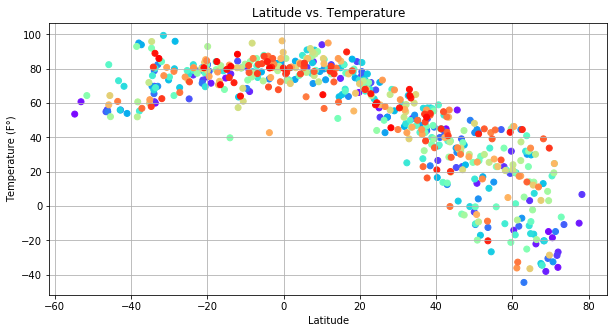

In [112]:
import matplotlib.cm as cm
plt.figure(figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, len(cities_df)))

plt.scatter(cities_df['Lat'], cities_df['Max Temp'], color = colors)
plt.title('Latitude vs. Temperature')
plt.xlabel("Latitude")
plt.ylabel('Temperature (F\N{DEGREE SIGN})')
plt.grid()
plt.show()

In [102]:
data1

,Unnamed: 0,Max Temp,Country,Humidity,Date,Wind Speed,City,Cloudiness,Lng,Lat
6,8,19.40,RU,62,1579802557,6.71,Kirillov,40,38.38,59.86
8,11,-14.80,CA,75,1579802560,10.29,Tuktoyaktuk,20,-133.04,69.45
11,15,-35.66,RU,93,1579802565,11.23,Saskylakh,10,114.08,71.92
13,17,-18.40,CA,75,1579802567,18.34,Clyde River,75,-68.59,70.47
18,22,-22.00,CA,67,1579802572,2.24,Pangnirtung,5,-65.71,66.15
...,...,...,...,...,...,...,...,...,...,...
514,562,37.99,US,100,1579803173,8.05,Springfield,90,-93.30,37.22
526,575,33.80,NO,97,1579803188,16.11,Tromso,75,18.96,69.65
527,576,20.14,RU,57,1579803189,30.89,Olga,0,135.29,43.74
537,586,21.13,TR,89,1579803200,10.71,Sungurlu,54,34.37,40.17


#### Latitude vs. Humidity Plot

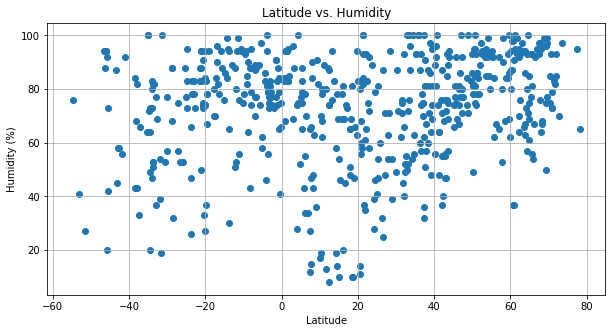

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Humidity'])
plt.title('Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

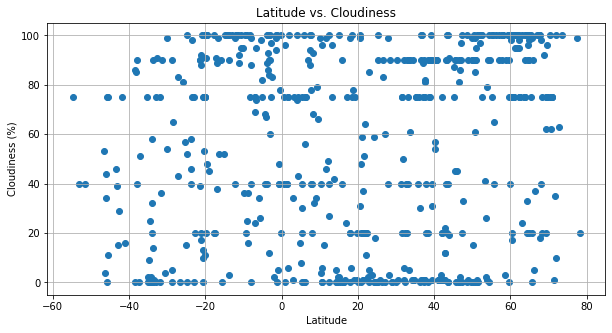

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Cloudiness'])
plt.title('Latitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

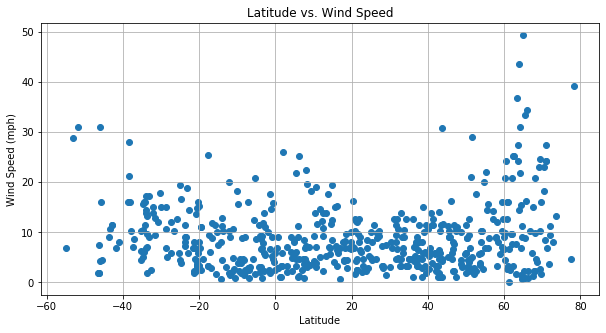

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Wind Speed'])
plt.title('Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
slope, intercept, r_value, p_value, stderr = linregress(cities_df['Max Temp'], )

In [12]:
# Create Northern and Southern Hemisphere DataFrames
n_hemis_df = cities_df[cities_df['Lat'] > 0]
s_hemis_df = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = -0.543408209328842
Intercept: = 60.468188766453906


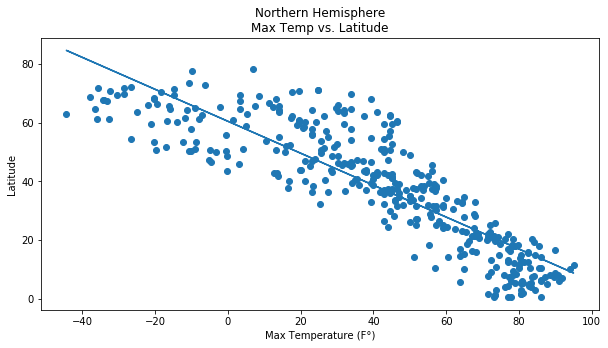

In [84]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Max Temp'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Max Temp'] + intercept

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')


plt.scatter(n_hemis_df['Max Temp'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Max Temp'], fit_model)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = 0.5410288521292581
Intercept: = -61.27349827677246


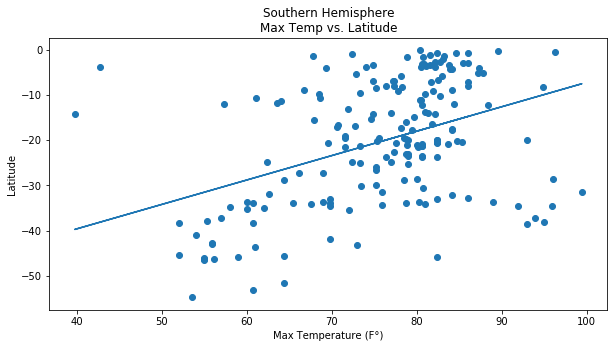

In [83]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Max Temp'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
plt.plot(s_hemis_df['Max Temp'], fit_model)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.3413773337579417
Intercept: = 13.000050442207737


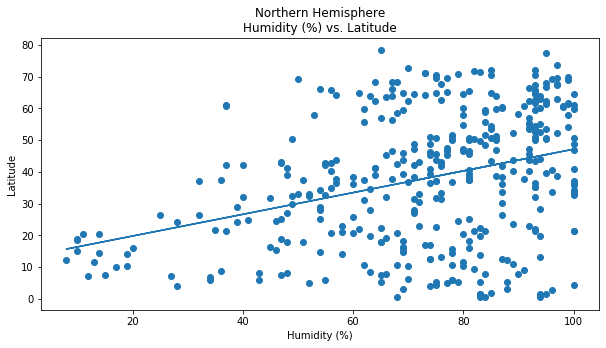

In [69]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Humidity'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Humidity'] + intercept

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Humidity'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Humidity'], fit_model)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.2077237513945201
Intercept: = -35.47093199066818


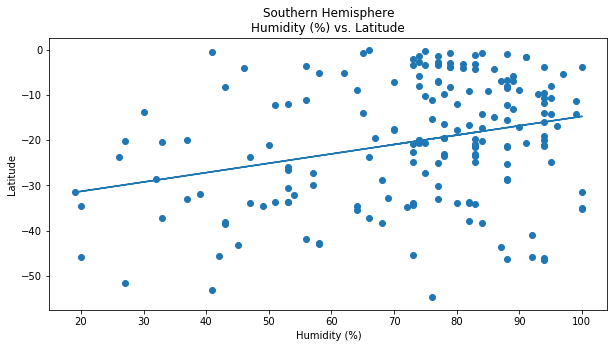

In [68]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Humidity'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Humidity'] + intercept

plt.figure(figsize=(10,5))
plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.scatter(s_hemis_df['Humidity'], s_hemis_df['Lat'])
plt.plot(s_hemis_df['Humidity'], fit_model)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.1363422376290007
Intercept: = 30.734712529832706


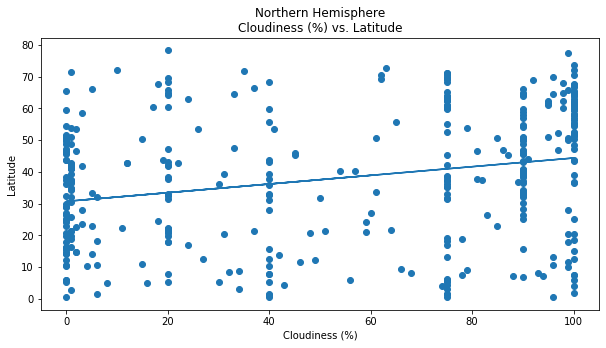

In [72]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Cloudiness'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Cloudiness'] + intercept

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Cloudiness'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Cloudiness'], fit_model)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.12933052091751143
Intercept: = -27.576342331161694


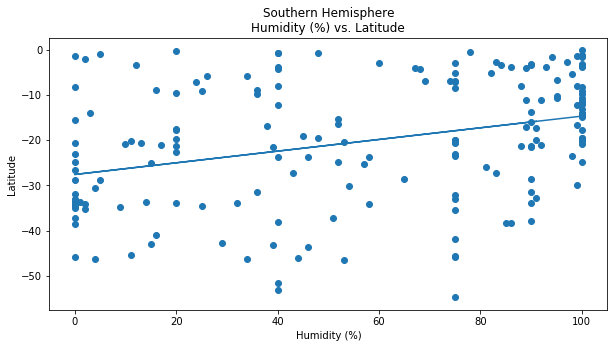

In [73]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Cloudiness'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
plt.plot(s_hemis_df['Cloudiness'], fit_model)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = 0.7074341318298636
Intercept: = 31.734828186901236


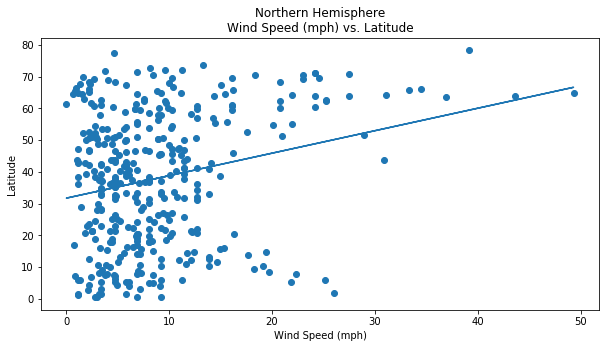

In [75]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Wind Speed'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Wind Speed'] + intercept

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Wind Speed'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Wind Speed'], fit_model)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = -0.7281573703295807
Intercept: = -13.920999176977027


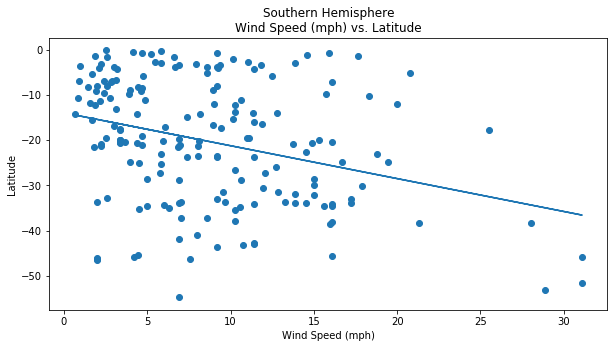

In [76]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Wind Speed'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
plt.plot(s_hemis_df['Wind Speed'], fit_model)
plt.show()